# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings("ignore")
pd.set_option('display.max_columns',100)

In [8]:
df=pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [9]:
df.shape

(119390, 32)

# EDA and Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.reservation_status_date=pd.to_datetime(df.reservation_status_date,format='%d/%m/%Y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [15]:
df.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [16]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:
df.groupby('hotel')['adr'].agg('sum')

hotel
City Hotel      8353803.24
Resort Hotel    3803814.36
Name: adr, dtype: float64

In [18]:
df.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [20]:
df.drop(['agent','company'],axis=1,inplace=True)
df.dropna(inplace=True)

In [21]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<Axes: >

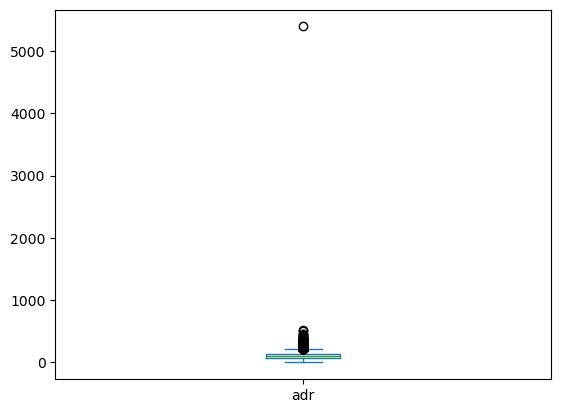

In [22]:
df.adr.plot(kind='box')

In [23]:
df1=df[df['adr']<5000]
df1.shape

(118897, 30)

In [24]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


In [25]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<Axes: >

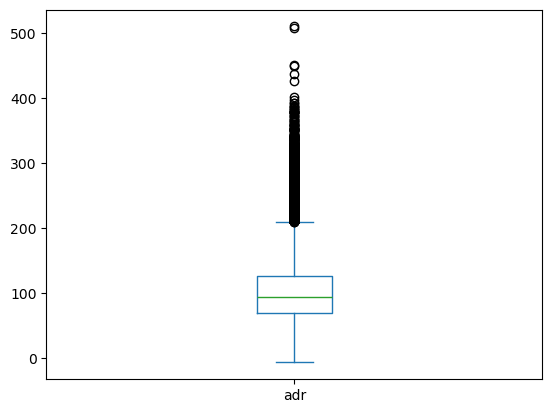

In [26]:
df1.adr.plot(kind='box')

# Data Visualization

In [27]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [28]:
df.is_canceled.value_counts()

is_canceled
0    74745
1    44153
Name: count, dtype: int64

<Axes: xlabel='hotel'>

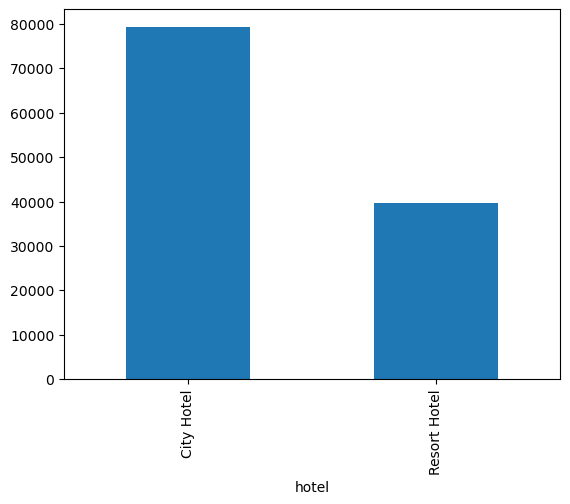

In [29]:
df1.hotel.value_counts().plot(kind='bar')

<Axes: xlabel='is_canceled'>

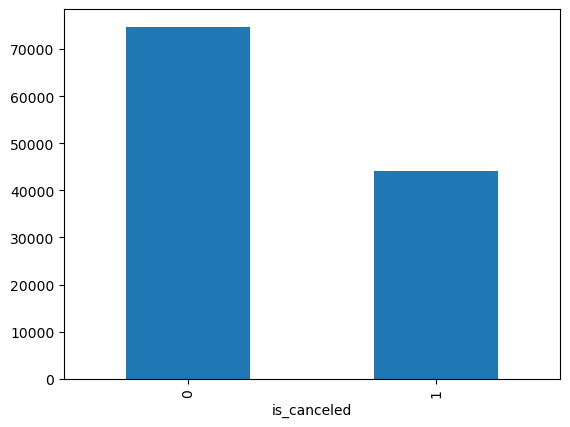

In [30]:
df1.is_canceled.value_counts().plot(kind='bar')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

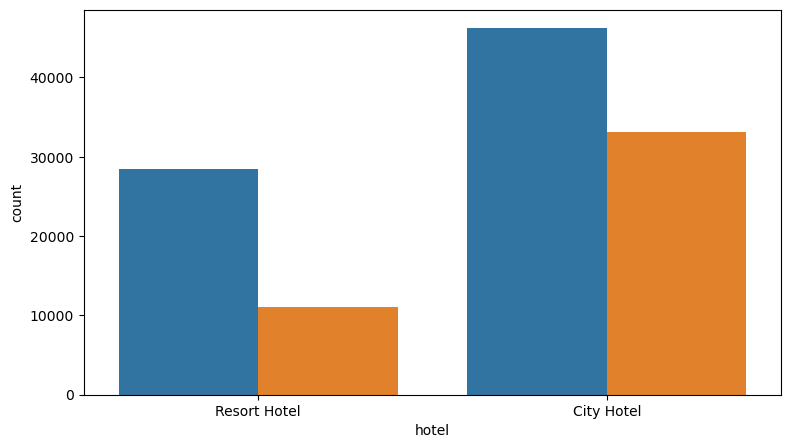

In [31]:
plt.figure(figsize=(9,5))
sns.countplot(data=df1,x='hotel',hue='is_canceled')
plt.legend(['not canceled', 'canceled'])
plt.xlabel("Hotels")
plt.ylabel("No of Reservations")
plt.show()

In [ ]:
df.reset_index(inplace = True)
resort=df[df['hotel']=='Resort Hotel']
resort.is_canceled.value_counts(normalize=True)

In [ ]:
city=df[df['hotel']=='City Hotel']
city.is_canceled.value_counts(normalize=True)

In [ ]:
city.columns

In [ ]:
cityADR=city.groupby('reservation_status_date')['adr'].mean()
resortADR=resort.groupby('reservation_status_date')['adr'].mean()
cityADR

In [ ]:
plt.figure(figsize=(22,10))
sns.lineplot(data=cityADR, label='City Hotel')
sns.lineplot(data=resortADR, label='Resort Hotel')

plt.legend(fontsize = 20)
plt.xlabel('Dates')
plt.show()

In [36]:
df1['month']=df['reservation_status_date'].dt.month
df1['monthN']=df['reservation_status_date'].dt.strftime('%B')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

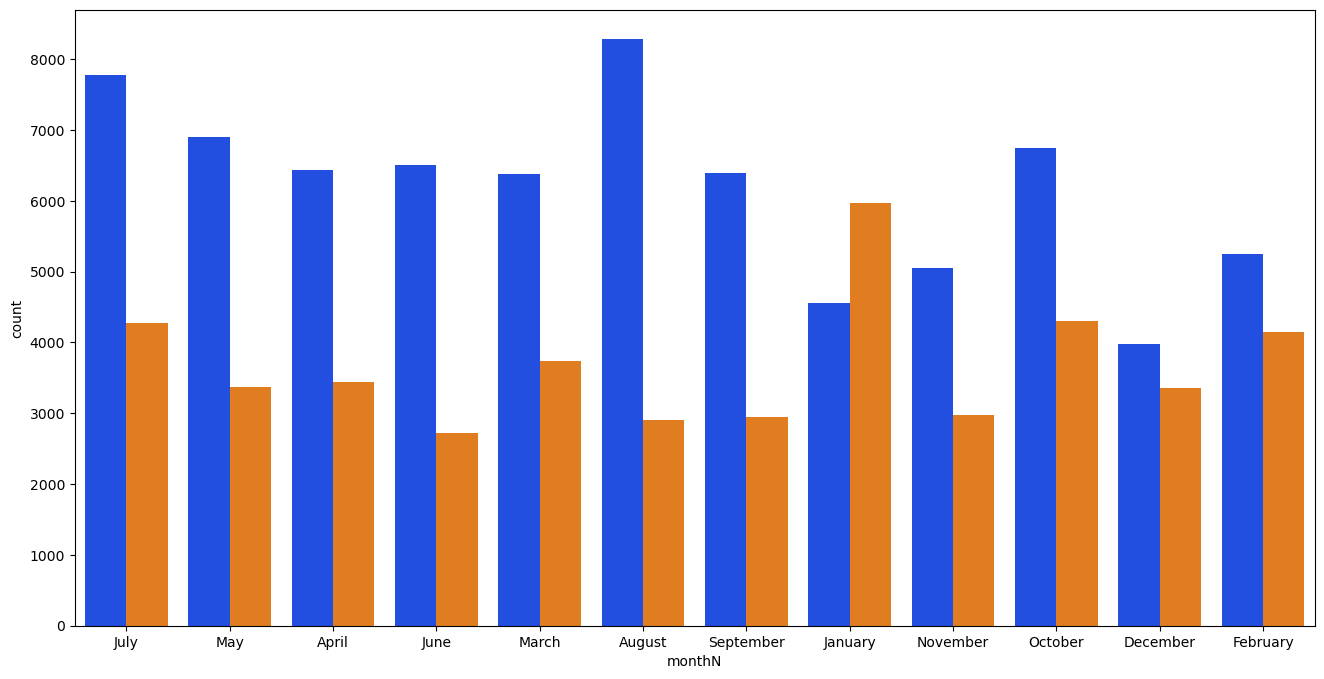

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(df1,x='monthN',palette = 'bright',hue='is_canceled')
plt.xlabel("Months")
plt.ylabel("Count of Reservations")
plt.legend(['not canceled', 'canceled'])
plt.show()

<Axes: xlabel='month', ylabel='adr'>

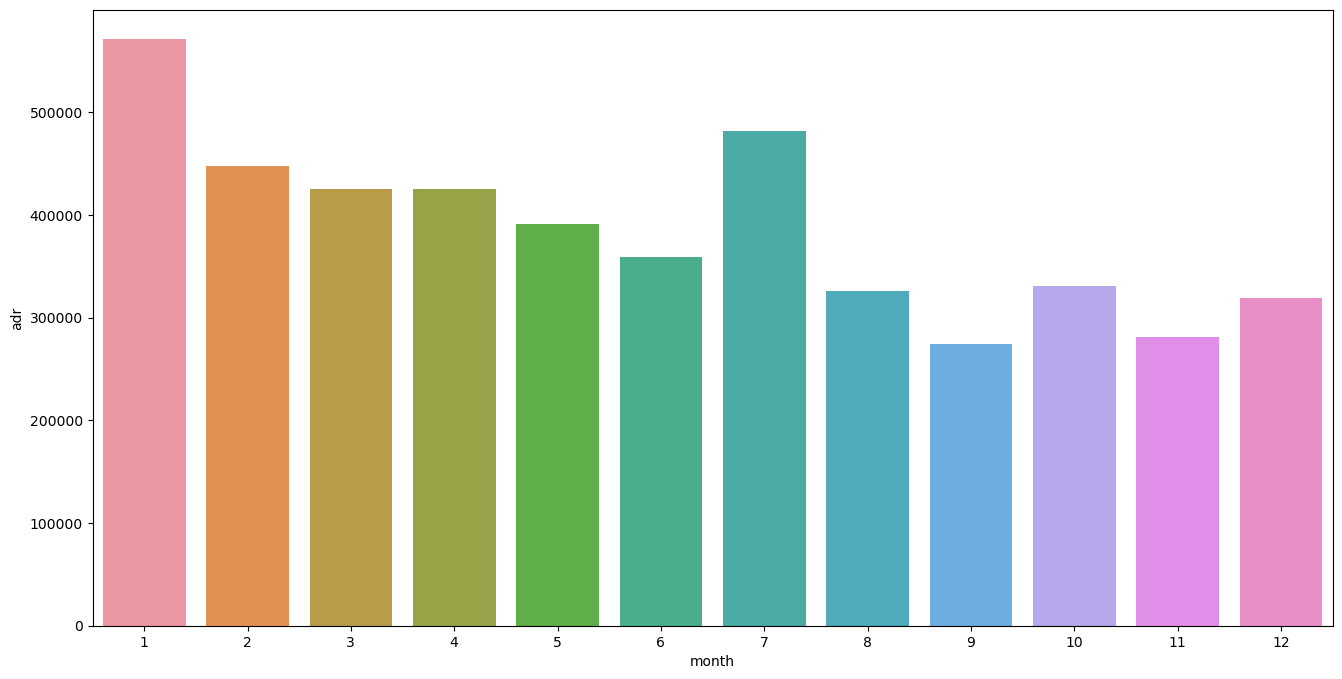

In [65]:
cancelledDF=df1[df1['is_canceled']==1]
plt.figure(figsize=(16,8))
sns.barplot(data=cancelledDF.groupby("month")[['adr']].sum().reset_index(),x='month',y='adr')

<Axes: xlabel='month', ylabel='adr'>

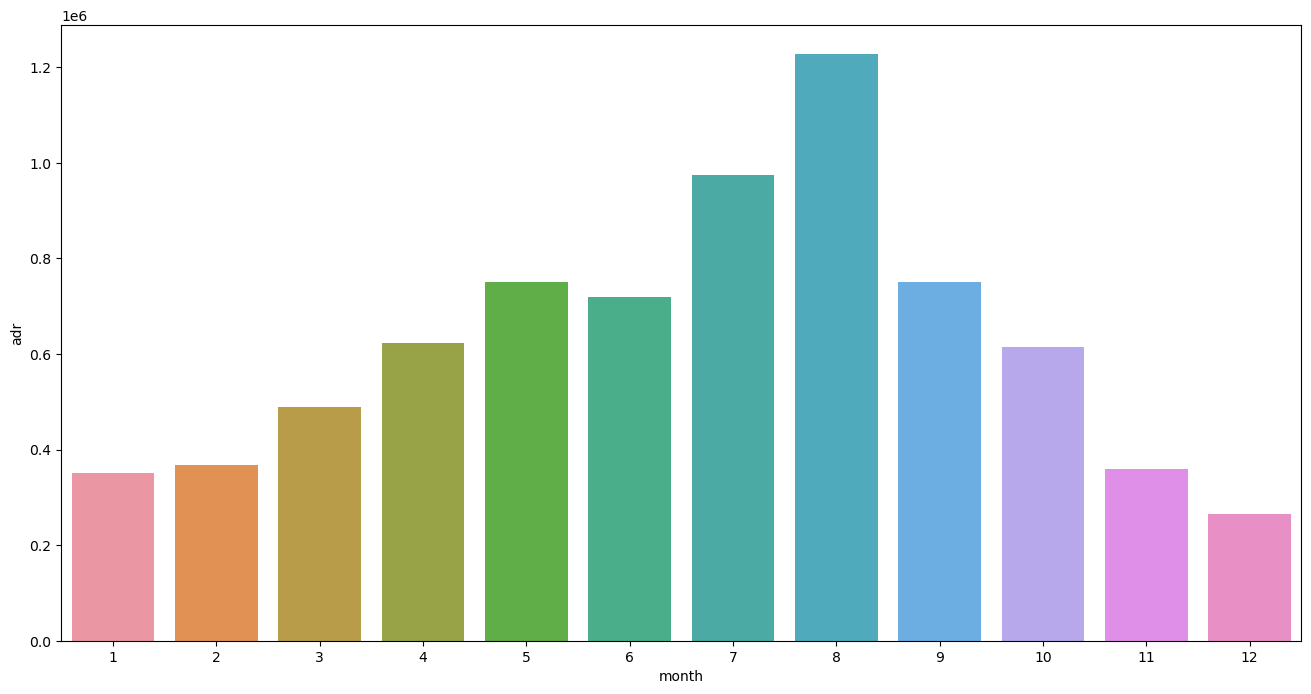

In [66]:
cancelledDF=df1[df1['is_canceled']==0]
plt.figure(figsize=(16,8))
sns.barplot(data=cancelledDF.groupby("month")[['adr']].sum().reset_index(),x='month',y='adr')

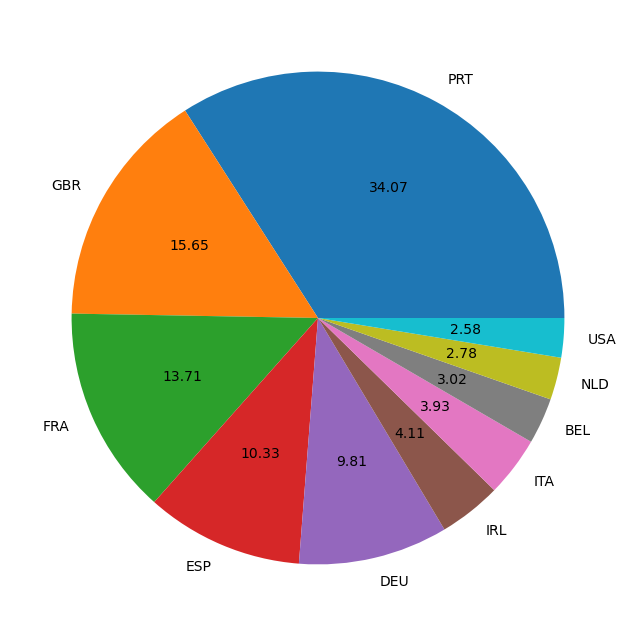

In [34]:
data=cancelledDF.country.value_counts().head(10)
plt.figure(figsize=(15,8))
plt.pie(data,autopct='%.2f',labels=data.index)
plt.show()

In [35]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [36]:
cancelledDF['market_segment'].value_counts()

market_segment
Online TA        35664
Offline TA/TO    15882
Direct           10528
Groups            7709
Corporate         4133
Complementary      644
Aviation           185
Name: count, dtype: int64

In [37]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'monthN'],
      dtype='object')

In [38]:
cancelleddf=df1[df1['is_canceled']==1]
cancelledADRdf=cancelleddf.groupby('reservation_status_date')[['adr']].mean()
notcancelleddf=df1[df1['is_canceled']==0]
notcancelledADRdf=notcancelleddf.groupby('reservation_status_date')[['adr']].mean()

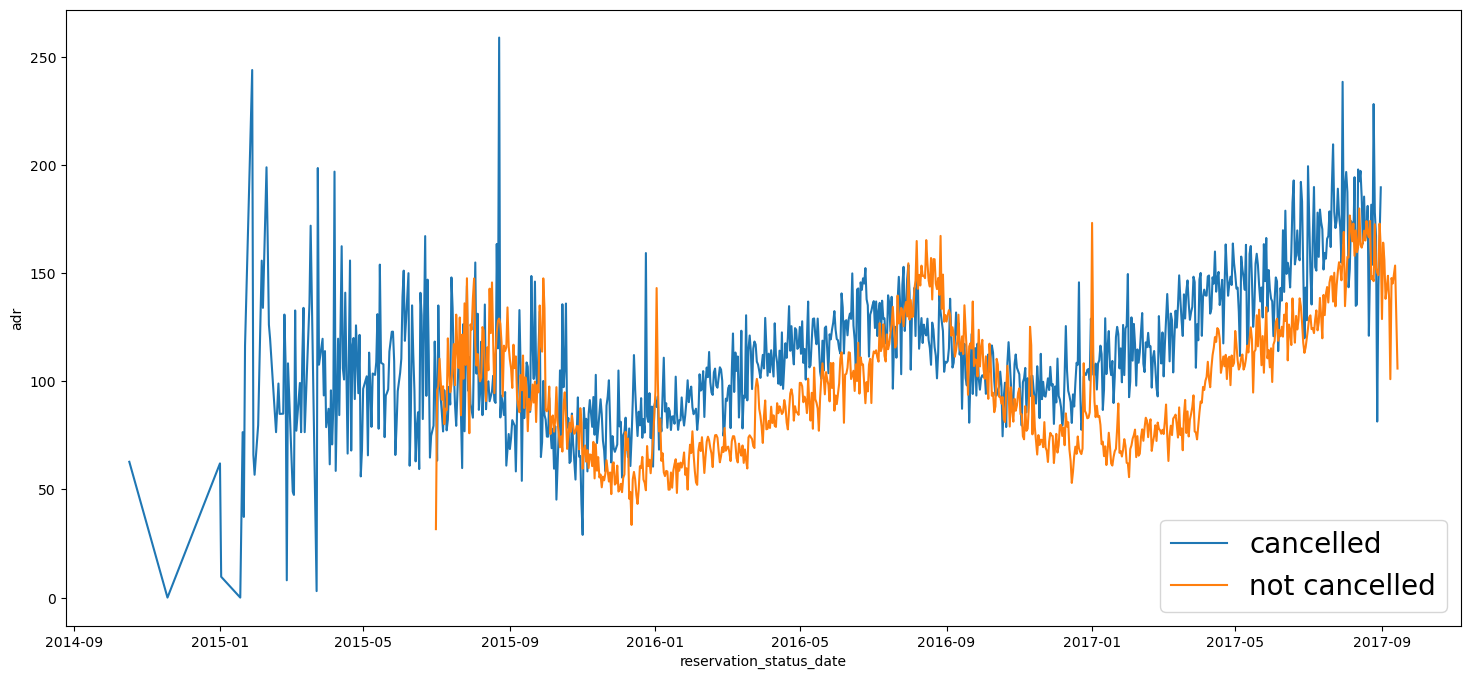

In [39]:
plt.figure(figsize=(18,8))
sns.lineplot(cancelledADRdf,x='reservation_status_date',y='adr',label='cancelled')
sns.lineplot(notcancelledADRdf,x='reservation_status_date',y='adr',label='not cancelled')
plt.legend(fontsize = 20)
plt.show()

In [40]:
cancelleddf = cancelleddf[(cancelleddf['reservation_status_date']>'2016') 
                                    & (cancelleddf['reservation_status_date']<'2017-09')]
notcancelleddf = notcancelleddf[(notcancelleddf['reservation_status_date']>'2016')
                                            & (notcancelleddf['reservation_status_date']<'2017-09')]

In [41]:
cancelledADRdf=cancelleddf.groupby('reservation_status_date')[['adr']].mean()
notcancelledADRdf=notcancelleddf.groupby('reservation_status_date')[['adr']].mean()

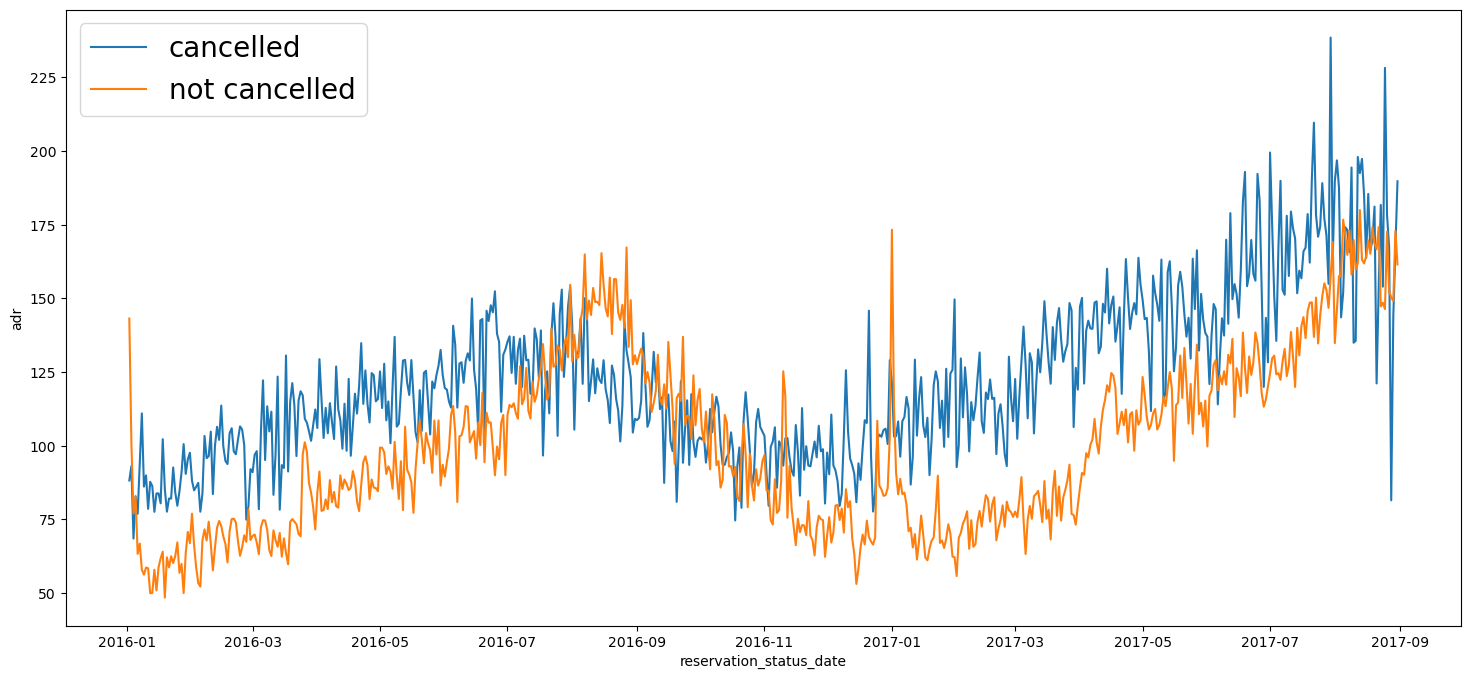

In [42]:
plt.figure(figsize=(18,8))
sns.lineplot(cancelledADRdf,x='reservation_status_date',y='adr',label='cancelled')
sns.lineplot(notcancelledADRdf,x='reservation_status_date',y='adr',label='not cancelled')
plt.legend(fontsize = 20)
plt.show()